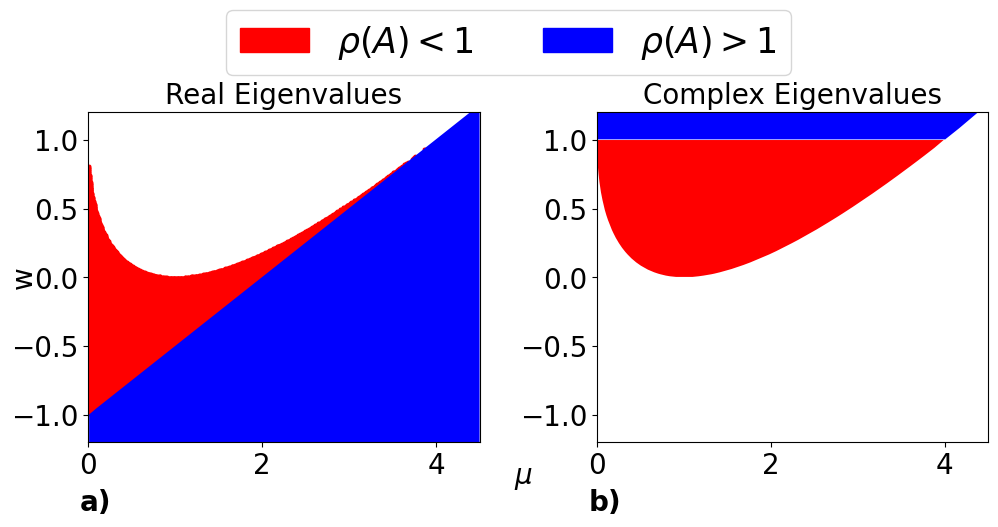

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  3 10:29:45 2023

@author: bzfkostr
"""


import numpy as np
import multiprocessing
from multiprocessing import Pool
from functools import partial
import math
from multiprocessing import Pool
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
# for Fig1 and Fig2: calculates the spectral radius for different parameters and the evolution of the first and second moments


Mu=np.linspace(0.01,4.5,500)
W=np.linspace(-1.2,1.2,500)
WMu=np.zeros((500,500))
            
#%%
Region1a=[]
Region1b=[]
for k in range(500):
    for j in range(500):
        w=W[k]
        mu=Mu[j]
        if (1+w-mu)**2>=4*w: # check if real
            lambda_plus=0.5*(1+w-mu+np.sqrt((1+w-mu)**2-4*w))
            lambda_minus=0.5*(1+w-mu-np.sqrt((1+w-mu)**2-4*w))
            
            if abs(lambda_plus)<1 and abs(lambda_minus)<1:
                Region1b.append([W[k],Mu[j]])
            
            else:
                Region1a.append([W[k],Mu[j]])
            

#%%
Region2a=[]
Region2b=[]
for k in range(500):
    for j in range(500):
        w=W[k]
        mu=Mu[j]
        if (1+w-mu)**2<4*w: # check if complex
         
            r=0.5*np.sqrt((1+w-mu)**2+np.abs(np.abs((1+w-mu)**2-4*w)))
            
            if r<1:
                Region2b.append([W[k],Mu[j]])
            
            else:
                Region2a.append([W[k],Mu[j]])            

# Define custom colors for your colormap
colors = [(0.0, 'red'),        # Color for values < 0
          (0.5, 'blue'),      # Color transition from 1 to 3
          (1.0, 'green')]     # Color for values >=3 

# Create the custom colormap
Cmap = LinearSegmentedColormap.from_list('custom_RdYlGn', colors)
Vmax = 2.5
Vmin = 0

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex='col', gridspec_kw={'hspace': -0.3})

# real
Region1b = np.array(Region1b)
axs[0].scatter(Region1b[:, 1], Region1b[:, 0], color='red', s=3)

Region1a = np.array(Region1a)
#axs[0].scatter(Region1a[:, 1], Region1a[:, 0], color='blue', s=15)

# complex
Region2b = np.array(Region2b)
#axs[1].scatter(Region2b[:, 1], Region2b[:, 0], color='red', s=15)

Region2a = np.array(Region2a)
#axs[1].scatter(Region2a[:, 1], Region2a[:, 0], color='blue', s=15)


axs[0].set_ylim([-1.2, 1.2])  # Set x-axis limits
axs[0].set_xlim([0, 4.5])     # Set y-axis limits

axs[1].set_ylim([-1.2, 1.2])  # Set x-axis limits
axs[1].set_xlim([0, 4.5])     # Set y-axis limits

axs[0].tick_params(labelsize=20)
axs[0].set_title('Real Eigenvalues', fontsize=20)

axs[1].tick_params(labelsize=20)
axs[1].set_title('Complex Eigenvalues', fontsize=20)

# x-axis label between the two plots
#fig.text(0.49, 0.1, r'$\mu$', ha='center', fontsize=20)

axs[0].text(5, -1.5, r'$\mu$', ha='center', fontsize=20)
axs[0].text(-0.9, 0, 'w', va='center', rotation='vertical', fontsize=20)

# y-axis label next to the left plot
#fig.text(0.02, 0.5, 'w', va='center', rotation='vertical', fontsize=20)

# Add legend

# Custom legend
legend_elements = [Patch(color='red', label=r'$\rho(A) < 1$'),
                   Patch(color='blue', label=r'$\rho(A) > 1$')]


#fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), fontsize=16)

fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.45, 1), fontsize=25, ncol=2)


# Other for Region 1a

hull1 = ConvexHull(Region1a)

# Get coordinates of convex hull
x_hull1 = Region1a[hull1.vertices, 1]
y_hull1 = Region1a[hull1.vertices, 0]

# Append the first data point at the end to create a closed path for filling
x_hull1_closed = np.append(x_hull1, x_hull1[0])
y_hull1_closed = np.append(y_hull1, y_hull1[0])

# Plot convex hull around Region1a
axs[0].add_patch(Polygon(np.column_stack((x_hull1_closed, y_hull1_closed)), closed=True, edgecolor=None, facecolor='blue', alpha=1))


# Other for Region 2a

hull2a = ConvexHull(Region2a)

# Get coordinates of convex hull
x_hull2a = Region2a[hull2a.vertices, 1]
y_hull2a = Region2a[hull2a.vertices, 0]

# Append the first data point at the end to create a closed path for filling
x_hull2a_closed = np.append(x_hull2a, x_hull2a[0])
y_hull2a_closed = np.append(y_hull2a, y_hull2a[0])

# Plot convex hull around Region1a
axs[1].add_patch(Polygon(np.column_stack((x_hull2a_closed, y_hull2a_closed)), closed=True, edgecolor=None, facecolor='blue', alpha=1))



# Other for Region 2b

hull2b = ConvexHull(Region2b)

# Get coordinates of convex hull
x_hull2b = Region2b[hull2b.vertices, 1]
y_hull2b = Region2b[hull2b.vertices, 0]

# Append the first data point at the end to create a closed path for filling
x_hull2b_closed = np.append(x_hull2b, x_hull2b[0])
y_hull2b_closed = np.append(y_hull2b, y_hull2b[0])

# Plot convex hull around Region1a
axs[1].add_patch(Polygon(np.column_stack((x_hull2b_closed, y_hull2b_closed)), closed=True, edgecolor=None, facecolor='red', alpha=1))



# Add labels "a)" and "b)" under each plot


axs[1].text(-0.1, -1.7, "b)", fontsize=20, weight='bold')
axs[0].text(-0.1, -1.7, "a)", fontsize=20, weight='bold')
#plt.subplots_adjust(top=0.85, bottom=0.25, left=0.1, right=0.88)
plt.subplots_adjust(top=0.8, bottom=0.25, left=0.1, right=0.85, wspace=0.3)


plt.savefig('Fig2.png', bbox_inches="tight")

#%%

